# 贷款预测数据集

在所有行业中，最为倚重数据分析技术的就是保险业。贷款预测数据集可以让保险公司对即将面对的挑战、选择的应对方式和影响有一个清晰的认识。与泰坦尼克数据集相同，它也是一个分类问题，该数据集共有 13 列 615 行。

典型问题：预测贷款申请能否得到批准。

[Get Data](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

**问题陈述**

> 关于公司

> * Dream Housing Finance公司在所有住房贷款中进行交易。他们在所有城市，半城市和农村地区都有业务。客户首先申请住房贷款后，该公司验证客户贷款资格。

> 问题

> * 公司希望根据填写在线申请表时提供的客户详细信息自动执行贷款资格流程（实时）。这些细节是性别，婚姻状况，教育，受抚养人数量，收入，贷款额度，信用记录等。为了实现这一过程的自动化，他们已经给识别客户细分带来了问题，这些客户细分有资格获得贷款金额，以便他们可以专门针对这些客户。他们在这里提供了一个部分数据集。

**数据**

| 变量 | 描述 |
| --- | --- |
|Loan_ID|独特的贷款ID|
|Gender|男性/女性|
|Married|申请人结婚（是/否）|
|Dependents|家属人数|
|Education|申请者教育（研究生/本科生）|
|Self_Employed|自雇人士（是/否）|
|ApplicantIncome|申请人收入|
|CoapplicantIncome|共同收入|
|LoanAmount|贷款金额以千计|
|Loan_Amount_Term|几个月的贷款期限|
|Credit_History|信用记录符合准则|
|Property_Area|城市/半城市/农村|
|Loan_Status|贷款批准（是/否）|


In [1]:
%ls -l

总用量 128
-rwxr--r-- 1 miaopei miaopei   340 3月  15 19:05 datatypes.csv*
drwxrwxr-x 3 miaopei miaopei  4096 3月  20 15:20 LoanPrediction/
-rwxr--r-- 1 miaopei miaopei 77360 3月  16 17:13 Pandas模块12种使用技巧.ipynb*
-rwxr--r-- 1 miaopei miaopei 38013 3月  15 18:15 train_u6lujuX_CVtuZ9i.csv*
-rw-rw-r-- 1 miaopei miaopei   582 3月  20 15:23 数据清洗方法.ipynb


In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv', index_col='Loan_ID')

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---

## 1. 布尔索引

如果需要以其它列数据值为条件过滤某一列的数据，您会怎么处理？例如建立一个列表，列表中全部为未能毕业但曾获得贷款的女性。这里可以使用布尔索引，代码如下：

In [3]:
data.loc[(data['Gender']=='Female') & (data['Education']=='Not Graduate') & (data['Loan_Status']=='Y'),
         ['Gender', 'Education', 'Loan_Status']]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


---

## 2. Apply 函数

Apply 函数是处理数据和建立新变量的常用函数之一。在向数据框的每一行或每一列传递指定函数后，Apply 函数会返回相应的值。这个由 Apply 传入的函数可以是系统默认的或者用户自定义的。例如，在下面的例子中它可以用于查找每一行和每一列中的缺失值。

In [4]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

print ''

#Applying per row:
print "nMissing values per row:"
print data.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

nMissing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


注：由于输出结果包含多行数据，第二个输出函数使用了 head() 函数以限定输出数据长度。在不限定输入参数时 head() 函数默认输出 5 行数据。

---

## 3. 填补缺失值

fillna() 函数可一次性完成填补功能。它可以利用所在列的均值/众数/中位数来替换该列的缺失数据。下面利用“Gender”、“Married”、和“Self_Employed”列中各自的众数值填补对应列的缺失数据。

In [5]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(data['Gender'])

/home/miaopei/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

输出结果返回了众数值和对应次数。需要记住的是由于可能存在多个高频出现的重复数据，因此众数可以是一个数组。通常默认使用第一个众数值：

In [6]:
mode(data['Gender']).mode[0]

'Male'

现在可以进行缺失数据值填补并利用 2. Apply函数 方法进行检查。

In [7]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)
 
#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


至此，可以确定缺失值已经被填补。请注意，上述方法是最基本的填补方法。包括缺失值建模，用分组平均数（均值/众数/中位数）填补在内的其他复杂方法将在接下来的文章中进行介绍。

---

## 4. 数据透视表

Pandas 可建立 MS Excel 类型的数据透视表。例如在下文的代码段里，关键列“LoanAmount” 存在缺失值。我们可以根据“Gender”，“Married”和“Self_Employed”分组后的平均金额来替换。 “LoanAmount”的各组均值可由如下方法确定：

In [8]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], 
                               index=["Gender","Married","Self_Employed"], 
                               aggfunc=np.mean)
print impute_grps

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


---

## 5. 复合索引

如果您注意观察 3. 填补缺失值 计算的输出内容，会发现它有一个奇怪的性质。即每个索引均由三个数值的组合构成，称为复合索引。它有助于运算操作的快速进行。

从 3. 填补缺失值 的例子继续开始，已知每个分组数据值但还未进行数据填补。具体的填补方式可结合此前学到的多个技巧来完成。

In [9]:
# iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]
 
# Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**注：**

1. 多值索引需要在 loc 语句中使用用于定义索引分组的元组结构。该元组会在函数中使用。

2. 应使用后缀 .values[0] 以避免潜在的错误。因为默认情况下复合索引返回的 Series 元素索引顺序与所在的数据框架（dataframe）不一致。在此条件下直接赋值会产生错误。

---

## 6. Crosstab 函数

该函数用于获取数据的初始印象（直观视图），从而验证一些基本假设。例如在本例中，“Credit_History”被认为会显著影响贷款状态。这个假设可以通过如下代码生成的交叉表进行验证：

In [10]:
pd.crosstab(data["Credit_History"],data["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


以上这些都是绝对值。但百分比形式能获得更为直观的数据结果。使用 apply 函数可实现该功能：

In [11]:
def percConvert(ser):
    return ser / float(ser[-1])
  
pd.crosstab(data["Credit_History"],data["Loan_Status"], margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


现在可以证明：与仅占9%的无信用记录人群相比，占比为80%的有信用记录人群获得贷款的几率会更高。

但这并不是全部的数据结果，其中还包含了一个有趣的内容。既然已知有信用记录非常重要，如果利用信用记录情况进行贷款预测会如何？其中，预测有信用记录的人的获得贷款状态为 Y，否则为 N。令人吃惊的是在614次测试中，共正确预测了 82+378=460 次，正确率高达75%！

如果您正好奇为什么我们需要统计模型，我一点儿也不会责怪您。但是请相信，提高预测精度是一项非常具有挑战性的任务，哪怕仅仅是在上述预测结果的基础上提高0.001%的预测精度也是如此。您会接受这个挑战吗？

注：75% 是对本文的训练数据集而言。测试数据集的结果将会有所不同，但也非常接近。同样地，希望通过这个例子能让大家明白为什么仅仅提高0.05%的预测精度就可在Kaggle排行榜中排名跃升500位。

## 7. 合并数据框（DataFrames）

当有来自不同数据源的信息需要收集整理时，合并数据框就变成了一项必不可少的基本操作。考虑一个假设的情况，即不同类型的房产有不同的均价（单位：INR / 平方米）。定义数据框如下：

In [12]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


现在可将上述信息与原始数据框合并如下：

In [13]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


上述透视表验证了合并操作成功。需要注意的是由于上述代码仅对数据值进行简单计算，因此‘values’参数在本例中是一个独立内容，与上下文无关。

## 8. 排列数据框架（DataFrames）

Pandas 允许基于多列数据进行简单排列。具体实现如下：

In [14]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


注：Pandas模块中的“sort”函数现已不再使用，应用“sort_values”函数进行代替。

## 9. 绘图（Boxplot 和 Histogram 函数）

许多人也许并没有意识到 Pandas 模块中的 boxplots 和 histograms 函数可以用于直接绘图，此时没有必要再单独调用 matplotlib 模块。一行命令即可完成相关功能。例如，如果想通过 Loan_Status 比较 ApplicantIncome 的分布情况，则实现代码如下：

/home/miaopei/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


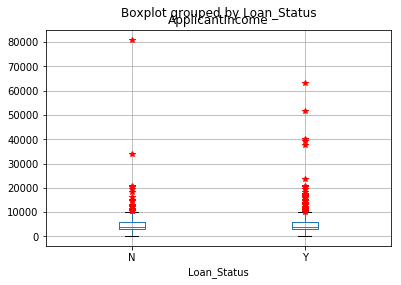

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
 
data.boxplot(column="ApplicantIncome",by="Loan_Status", sym='r*')

plt.show()

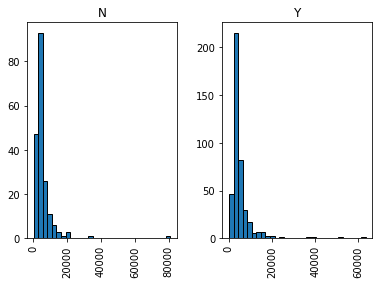

In [16]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30, edgecolor='black', linewidth=1.0);

上图的数据结果表明，由于获得贷款人群和未获得贷款人群数没有明显的收入差距，因此个人收入水平高低并非是否能获得贷款的主要决定因素。

## 10. 使用 Cut 函数进行分箱

有时将数值数据聚合在一起会更有意义。例如，如果我们要根据一天中的某个时间段（单位：分钟）建立交通流量模型模型（以路上的汽车为统计目标）。与具体的分钟数相比，对于交通流量预测而言一天中的具体时间段则更为重要，如“早上”、 “下午”、“傍晚”、“夜晚”、“深夜（Late Night）”。以这种方式建立交通流量模型则更为直观且避免了过拟合情况的发生。

下面的例子中定义了一个简单的可重用函数，该函数可以非常轻松地实现任意变量的分箱功能。

In [17]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin
 
#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64


## 11. 为名义变量编码

通常我们会遇到需要对名义变量进行分类的情况。可能的原因如下：

1. 一些算法（如逻辑回归算法）要求输入参数全部为数字。因此名义变量多需要编码为0, 1….(n-1)。

2. 有时同一种分类可以表示为两种形式。如温度可能被记录为“高（High）”、“中（Medium）”、“低（Low）”、“高（H）”、“低（low）”。在这里，“高（High）”和“高（H）”都表示同一种分类。类似地在“低（Low）”和“低（low）”的表示方法中仅存在大小写的区别。但 python 将会将它们视为不同的温度水平。

3. 一些分类的出现频率可能较低，因此将这些分类归为一类不失为一个好主意。

下面的例子中定义了一个通用函数，该函数使用字典作为输入，并利用 Pandas 模块的‘replace’函数对字典值进行编码。

In [18]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
        
    return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(data["Loan_Status"])

print ""

data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print 'nAfter Coding:'
print pd.value_counts(data["Loan_Status_Coded"])

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

nAfter Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


编码前后的计数结果一致，证明编码正确。

## 12. 对数据框的行数据进行迭代

这个操作不经常使用。但您也不希望被这个问题卡住，对吧？有时需要利用 for 循环对所有行数据进行迭代。例如一个常见的问题即是 Python 中变量的不当处理。通常发生在如下情况：

1. 带有数字的名义变量被认为是数值数据。

2. 由于数据错误，带有字符的数值变量输入行数据中时被认为是分类变量。

因此手动定义列数据类型会是一个不错的主意。如果检查所有列数据的数据类型：

In [19]:
#Check current type:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

会看到名义变量 Credit_History 被显示为 float 类型。解决这种问题的一个好方法即是创建一个包含列名和对应类型的 csv 文件。这样就可以定义一个通用函数来读取文件，并指定列数据的类型。例如在下面的例子里建立了一个 csv 文件“datatypes.csv”。

In [20]:
%ls -l

总用量 128
-rwxr--r-- 1 miaopei miaopei   340 3月  15 19:05 datatypes.csv*
drwxrwxr-x 3 miaopei miaopei  4096 3月  20 15:20 LoanPrediction/
-rwxr--r-- 1 miaopei miaopei 77360 3月  16 17:13 Pandas模块12种使用技巧.ipynb*
-rwxr--r-- 1 miaopei miaopei 38013 3月  15 18:15 train_u6lujuX_CVtuZ9i.csv*
-rw-rw-r-- 1 miaopei miaopei   582 3月  20 15:23 数据清洗方法.ipynb


In [21]:
#Load the file:
colTypes = pd.read_csv('datatypes.csv')
print colTypes

              feature         type
0             Loan_ID  categorical
1              Gender  categorical
2             Married  categorical
3          Dependents  categorical
4           Education  categorical
5       Self_Employed  categorical
6     ApplicantIncome   continuous
7   CoapplicantIncome   continuous
8          LoanAmount   continuous
9    Loan_Amount_Term   continuous
10     Credit_History  categorical
11      Property_Area  categorical
12        Loan_Status  categorical


加载数据后可以对每一行进行迭代，并利用‘type’列中的数据内容确定‘feature’列中对应变量名的数据类型。

In [22]:
# 去除 Loan_ID 行数据，因为在 data 中 Loan_ID 作为了索引

df = colTypes.drop(0, axis=0)
df

,feature,type
1,Gender,categorical
2,Married,categorical
3,Dependents,categorical
4,Education,categorical
5,Self_Employed,categorical
6,ApplicantIncome,continuous
7,CoapplicantIncome,continuous
8,LoanAmount,continuous
9,Loan_Amount_Term,continuous
10,Credit_History,categorical


In [23]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

colTypes = df

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
        
print data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object


## Reference

[干货 | 从菜鸟到老司机，数据科学的 17 个必用数据集推荐](https://www.leiphone.com/news/201611/T5iHy9iqqhBVtsz8.html)

[从菜鸟到老司机，数据科学的 17 个必用数据集推荐 Address](http://blog.csdn.net/mtj66/article/details/73848571)

[Python数据处理：Pandas模块的 12 种实用技巧](http://python.jobbole.com/85742/)

[pandas常用函数清单 简书](https://www.jianshu.com/p/6eb5499cd07d)

[pd.read_csv english](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

[pd.read_csv 中文](http://python.usyiyi.cn/documents/Pandas_0j2/generated/pandas.read_csv.html)

[pd.read_csv 简书](https://www.jianshu.com/p/366aa5daaba9)

[pandas 常用的函数](https://www.jianshu.com/p/8bf430281a5c)

[机器学习基础与实践（一）----数据清洗](http://www.cnblogs.com/charlotte77/p/5606926.html)